Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



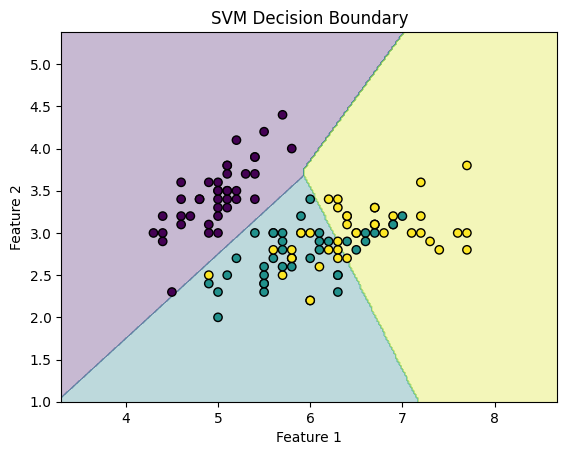

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (Iris dataset for classification)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only 2 features for visualization
y = iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train SVM model
svm_model = SVC(kernel='linear', C=1.0)  # Linear kernel
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualizing decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundary(X_train, y_train, svm_model)

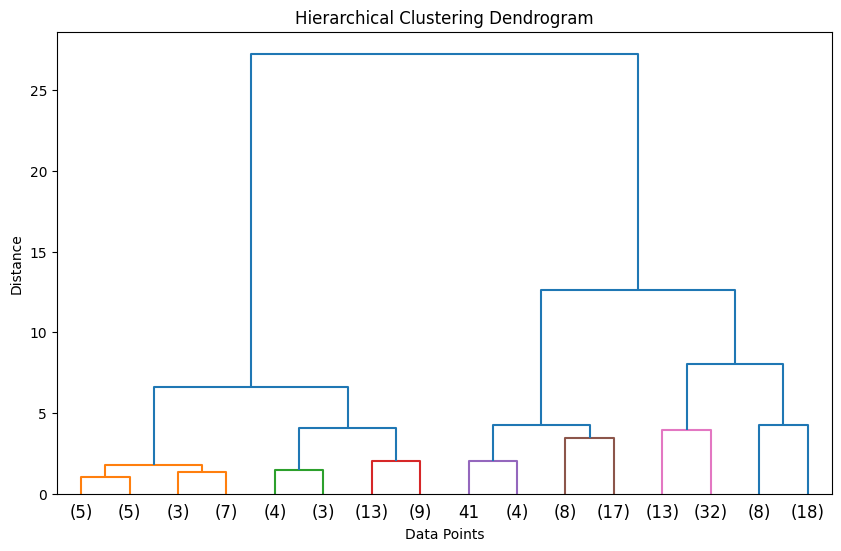

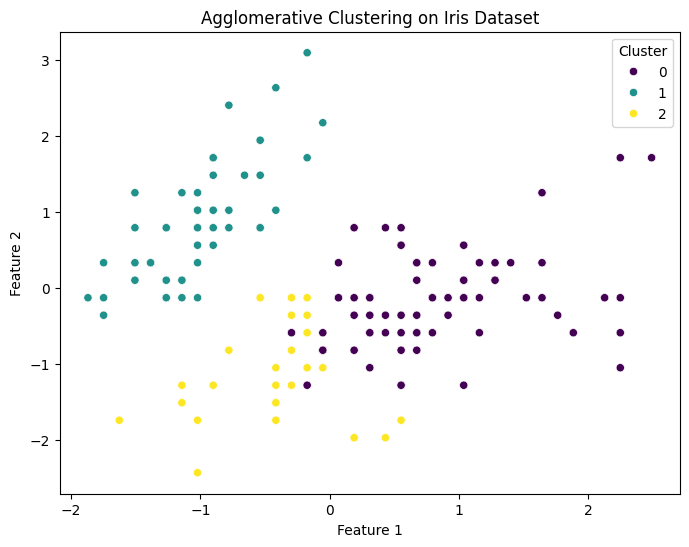

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels (for reference, not used in clustering)

# Standardize the features (important for distance-based clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute hierarchical clustering linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')  # 'ward' minimizes variance

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3, color_threshold=4)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering
n_clusters = 3  # Based on dendrogram observation
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = agg_clustering.fit_predict(X_scaled)

# Convert to DataFrame for visualization
df = pd.DataFrame(X_scaled, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
df['Cluster'] = clusters

# Plot clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Feature1'], y=df['Feature2'], hue=df['Cluster'], palette='viridis')
plt.title("Agglomerative Clustering on Iris Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()